# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [179]:
df.columns.str.lower()


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [180]:
df.columns = [x.lower() for x in df.columns]

df.columns


    

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [181]:
df.columns = map(str.lower, df.columns)

df.columns


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [182]:
df.columns = df.columns.map(lambda x: x.lower())
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

# Change the Index to be the Line Names

In [183]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [184]:
df = df.set_index('linename')

In [185]:
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [186]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'division', 'date', 'time', 'desc',
       'entries',
       'exits                                                               '],
      dtype='object')

# Painstakingly change the index back

In [187]:
df = df.reset_index()

df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [188]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))

df


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,7
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,7
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,7
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,7
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524,7


In [189]:
def Count(linename):
    for i in range(len(df.linename)):
        return len(linename)
    
df['Num_Lines'] = df.linename.map(Count)

df.head()
df.tail()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348,1
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348,1
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348,1
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348,1
197624,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,21:00:00,REGULAR,5554,348,1


In [190]:
df.Num_Lines == df['Num_Lines']

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
197595    True
197596    True
197597    True
197598    True
197599    True
197600    True
197601    True
197602    True
197603    True
197604    True
197605    True
197606    True
197607    True
197608    True
197609    True
197610    True
197611    True
197612    True
197613    True
197614    True
197615    True
197616    True
197617    True
197618    True
197619    True
197620    True
197621    True
197622    True
197623    True
197624    True
Name: Num_Lines, Length: 197625, dtype: bool

## Write a function to clean a column name.

In [191]:
def clean(col_name):
    cleaned = col_name.rstrip()
    return cleaned

In [192]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [193]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [195]:
df.date.dtype
df.date = pd.to_datetime(df.date)
df['day_of_week'] = df.date.dt.day_name()

df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,Saturday
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,Sunday
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,Sunday
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,Sunday
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,Sunday


In [201]:
df.Num_Lines.groupby(df.day_of_week).count()


day_of_week
Friday       28101
Monday       28254
Saturday     27767
Sunday       28081
Thursday     28447
Tuesday      28772
Wednesday    28203
Name: Num_Lines, dtype: int64

In [202]:
x = df.day_of_week.unique()
y = df.Num_Lines.groupby(df.day_of_week).count()


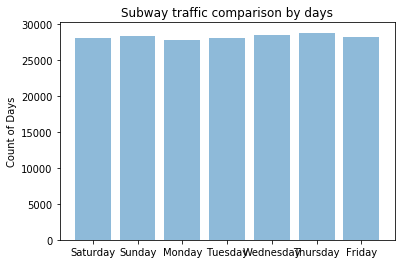

In [204]:

plt.bar( x, y, align='center', alpha=0.5)
plt.ylabel('Count of Days')
plt.title('Subway traffic comparison by days')
 
plt.show()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [205]:
df.Num_Lines.groupby(df.day_of_week).count()


day_of_week
Friday       28101
Monday       28254
Saturday     27767
Sunday       28081
Thursday     28447
Tuesday      28772
Wednesday    28203
Name: Num_Lines, dtype: int64

# Drop a couple of columns

In [210]:
df.drop('unit', axis = 1)

,linename,c/a,scp,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week
0,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday
5,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,Saturday
6,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,Sunday
7,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,Sunday
8,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,Sunday
9,NQR456W,A002,02-00-00,59 ST,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,Sunday
